# Hypercube Example

## Load in libraries

In [1]:
import numpy as np
from pyDOE import ff2n
from scipy.spatial.distance import pdist, squareform
import hypertools as hyp

%matplotlib inline

## Define hypercube functions

In [2]:
def hypercube(ndims=4, res=100, x_min=-1, x_max=1):
    length = x_max - x_min
    vertices = (ff2n(ndims) + 1) / 2
    vertices *= length
    vertices += x_min

    dists = squareform(pdist(vertices))
    n_edges = np.sum(dists == length) / 2

    x = np.zeros([n_edges * res, ndims])
    ind = 0
    for i in range(vertices.shape[0]):
        for j in range(i):
            if dists[i, j] == length:
                next = np.zeros([res, ndims])
                for d in range(ndims):
                    next[:, d] = np.linspace(vertices[i, d], vertices[j, d], res)
                x[np.arange(ind, ind+res), :] = next
                ind += res

    return x

## Create, plot, and save cube of desired dimensionality

DIMS: 3


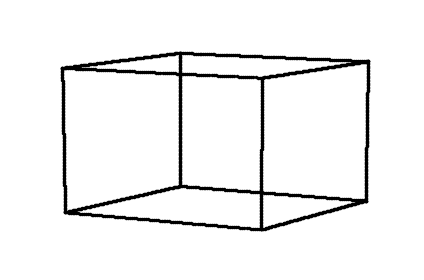

DIMS: 4


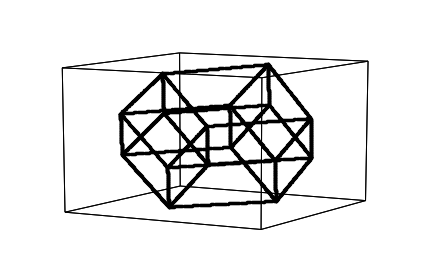

DIMS: 5


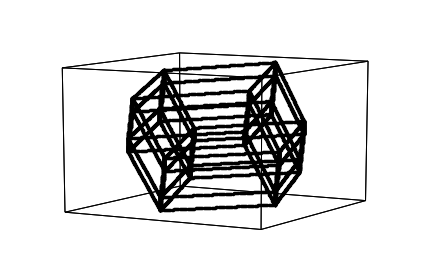

DIMS: 6


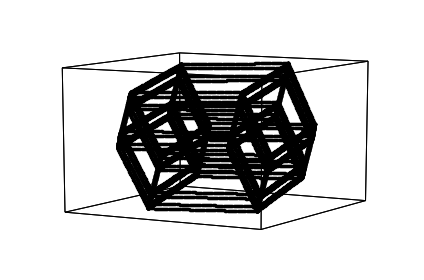

DIMS: 7


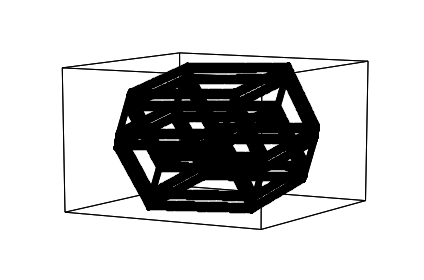

DIMS: 8


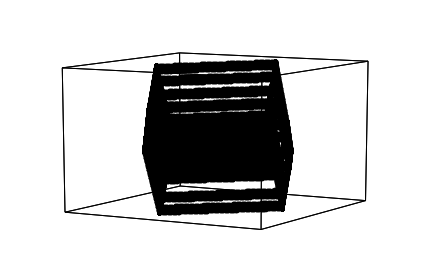

In [3]:
for dims in range(3,9):
    print('DIMS: ' + str(dims))
    hyp.plot(hypercube(dims), 'k.')